In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl

In [5]:
class grid:

    def __init__(self, start, end, n_points) -> None:
        self.x_initial = start
        self.x_final = end
        self.N = n_points
        self.dx = (end - start)/n_points

    def x_values(self):
        x = np.linspace(self.x_initial, self.x_final, self.N + 1)
        return x[1:-1]

        
class hydrogen:

    def __init__(self, grid) -> None:
        self.grid = grid

    def V_DVR(self):
        d = 0.17
        a = 1.04
        xe = 1.4

        v = d*((1-np.exp(-a*(self.grid.x_values()-xe)))**2) - d

        return np.diag(v)
    
    def T_DVR(self):
        cons = 1/((918)*(self.grid.dx**2))
        T =  np.zeros((self.grid.N-1, self.grid.N-1))
        
        for i in range(self.grid.N-1):
            for j in range(self.grid.N-1):
                if i == j:
                    T[i,j] = cons*((np.pi**2)/3 - 1/(2*((i+1)**2)))
                else:
                    T[i,j] = cons*((-1)**(i-j))*((2/(i-j)**2) - (2/(i+j)**2))
        
        return T
    
    def H_DVR(self):

        return self.T_DVR() + self.V_DVR()

In [72]:
def energy(state, number_of_functions):
    """number of wavefunctions must be 2 more than your energy state."""
    
    grid_ = grid(0, 10, number_of_functions)
    hamiltonian = hydrogen(grid_).H_DVR()

    eigenvalues = sl.eigh(hamiltonian, eigvals_only=True)

    energy_state = eigenvalues[state]

    return energy_state

In [73]:
ground_state_values = []

for i in range(2,200):
    ground_state = energy(0, i)
    ground_state_values.append(ground_state)

In [74]:
len(ground_state_values)

198

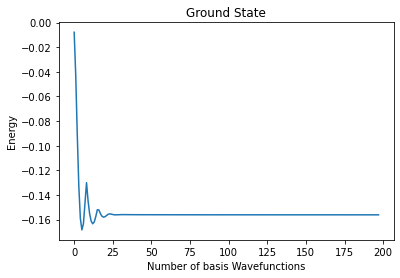

In [75]:
plt.xlabel("Number of basis Wavefunctions")
plt.ylabel("Energy")
plt.title("Ground State")
plt.plot(ground_state_values)
plt.show()

In [39]:
energy(1, 3)

7.618483742496581e-05

In [30]:
np.linspace(1,5,1)

array([1.])

In [76]:
def state_energies(state, number_of_wavefunctions):
    """number of wavefunctions must be 2 more than your energy state."""

    state_energy_values = []
    
    for i in range(state+2, number_of_wavefunctions+state+2):
        energy_state = energy(state, i)
        state_energy_values.append(energy_state)
    
    plt.xlabel("Number of basis Wavefunctions")
    plt.ylabel("Energy")
    plt.title(f"{state} State")
    plt.plot(state_energy_values)
    plt.show()
    return None

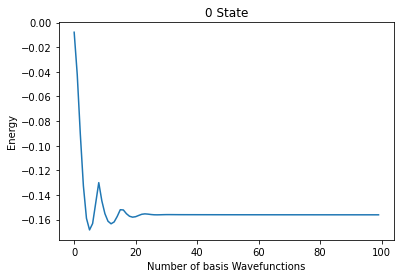

In [77]:
state_energies(0, 100)